In [1]:
#import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#load the datasets
train = pd.read_csv('loan-train.csv')
test = pd.read_csv('loan-test.csv')

In [3]:
#observe the data
train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [4]:
train_columns = train.columns
train_columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [5]:
train.shape

(614, 13)

In [6]:
test.shape

(367, 12)

#### Analysing the data

In [7]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [8]:
train.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [10]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

## Exploratory Data Analysis

In [11]:
train.groupby(by='Loan_Status').sum()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
Loan_Status,,,,,
N,1045647,360539.000000,27371.0,63996.0,97.0
Y,2272077,634905.919989,59305.0,141204.0,378.0


In [12]:
#function to print value counts of categorical varables
def feature_dist(df,feature_name):
    if df[feature_name].dtype == 'object':
        print( df[feature_name].value_counts())    

In [13]:
#for every feature which is categorical call above defined function
for featureName in train_columns:
    if train[featureName].dtype == 'object':
        print('\n"' + str(featureName) + '\'s" Values with count are :')
        feature_dist(train, str(featureName))


"Loan_ID's" Values with count are :
LP002515    1
LP001027    1
LP001811    1
LP002284    1
LP002926    1
           ..
LP001034    1
LP002941    1
LP002778    1
LP002784    1
LP001768    1
Name: Loan_ID, Length: 614, dtype: int64

"Gender's" Values with count are :
Male      489
Female    112
Name: Gender, dtype: int64

"Married's" Values with count are :
Yes    398
No     213
Name: Married, dtype: int64

"Dependents's" Values with count are :
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

"Education's" Values with count are :
Graduate        480
Not Graduate    134
Name: Education, dtype: int64

"Self_Employed's" Values with count are :
No     500
Yes     82
Name: Self_Employed, dtype: int64

"Property_Area's" Values with count are :
Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

"Loan_Status's" Values with count are :
Y    422
N    192
Name: Loan_Status, dtype: int64


<AxesSubplot:xlabel='Property_Area', ylabel='count'>

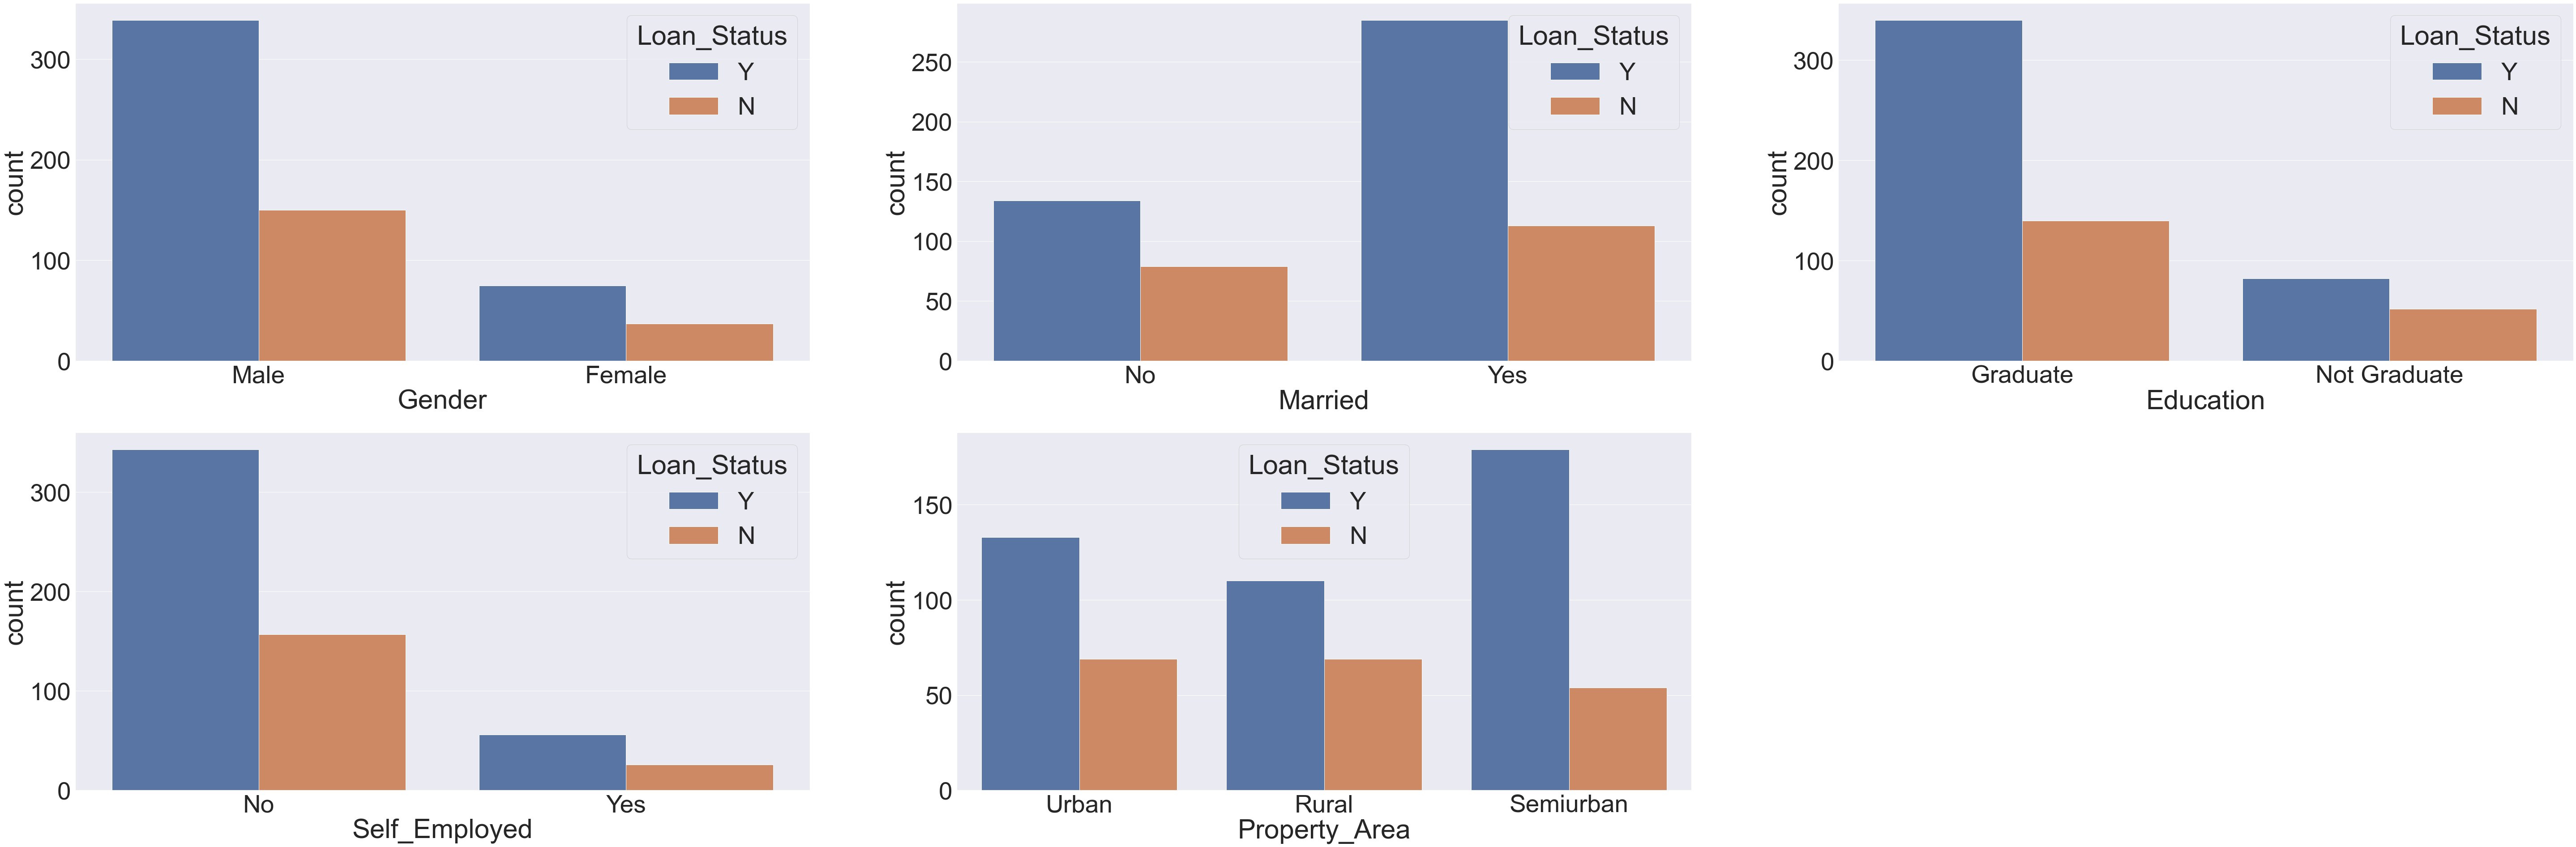

In [14]:
#relation between different categorical features and loan status
plt.figure(figsize=(100,50))
sns.set(font_scale=5)
plt.subplot(3,3,1)
sns.countplot(x='Gender',hue=train['Loan_Status'],data = train)

plt.subplot(3,3,2)
sns.countplot(x='Married',hue=train['Loan_Status'],data = train)

plt.subplot(3,3,3)
sns.countplot(x='Education',hue=train['Loan_Status'],data = train)

plt.subplot(3,3,4)
sns.countplot(x='Self_Employed',hue=train['Loan_Status'],data = train)

plt.subplot(3,3,5)
sns.countplot(x='Property_Area',hue=train['Loan_Status'],data = train)

In [15]:
pd.crosstab(train['Dependents'],train['Loan_Status'],margins=True)

Loan_Status,N,Y,All
Dependents,,,
0,107,238,345
1,36,66,102
2,25,76,101
3+,18,33,51
All,186,413,599


### dealing with missing values

In [16]:
#visualisation to understand the presence and distribution of missing data within pandas dataframe
import missingno as msno

<AxesSubplot:>

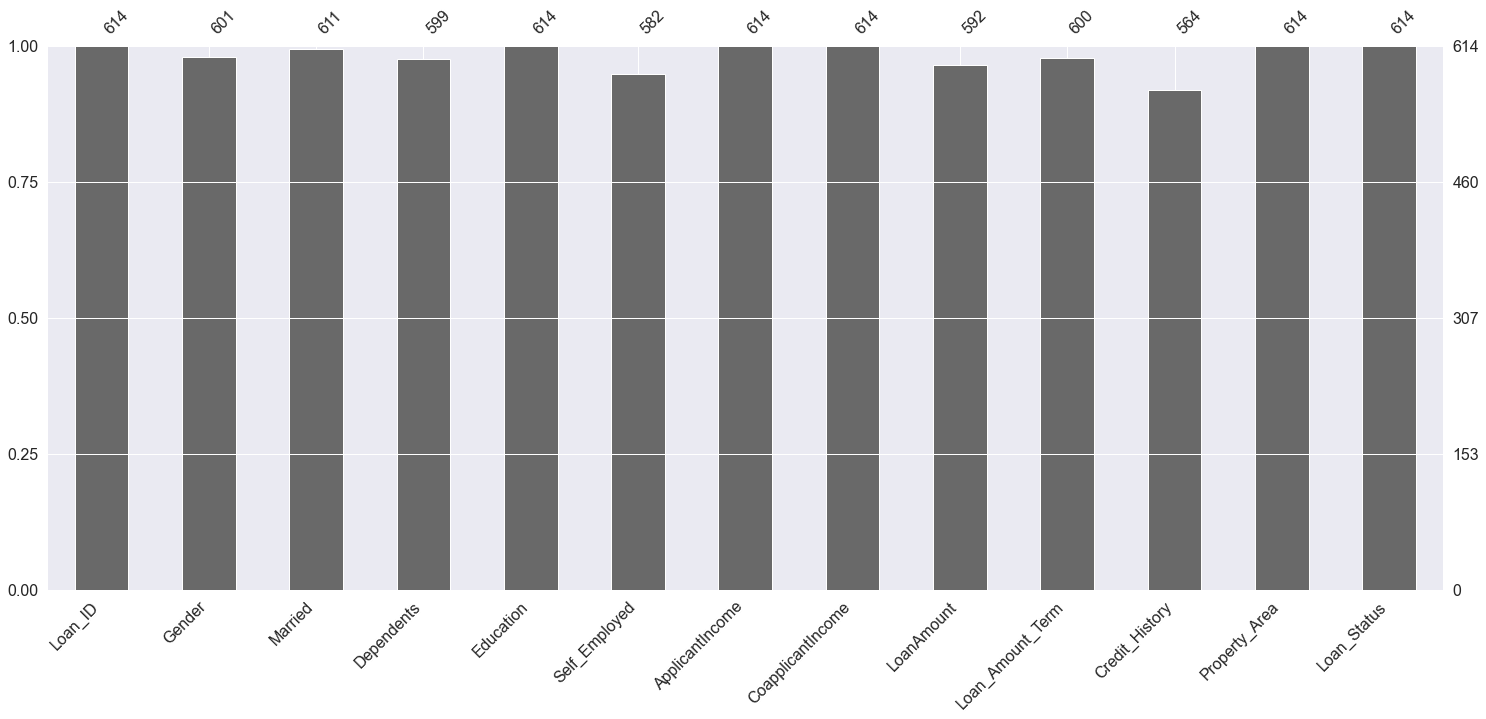

In [17]:
msno.bar(train)

<AxesSubplot:>

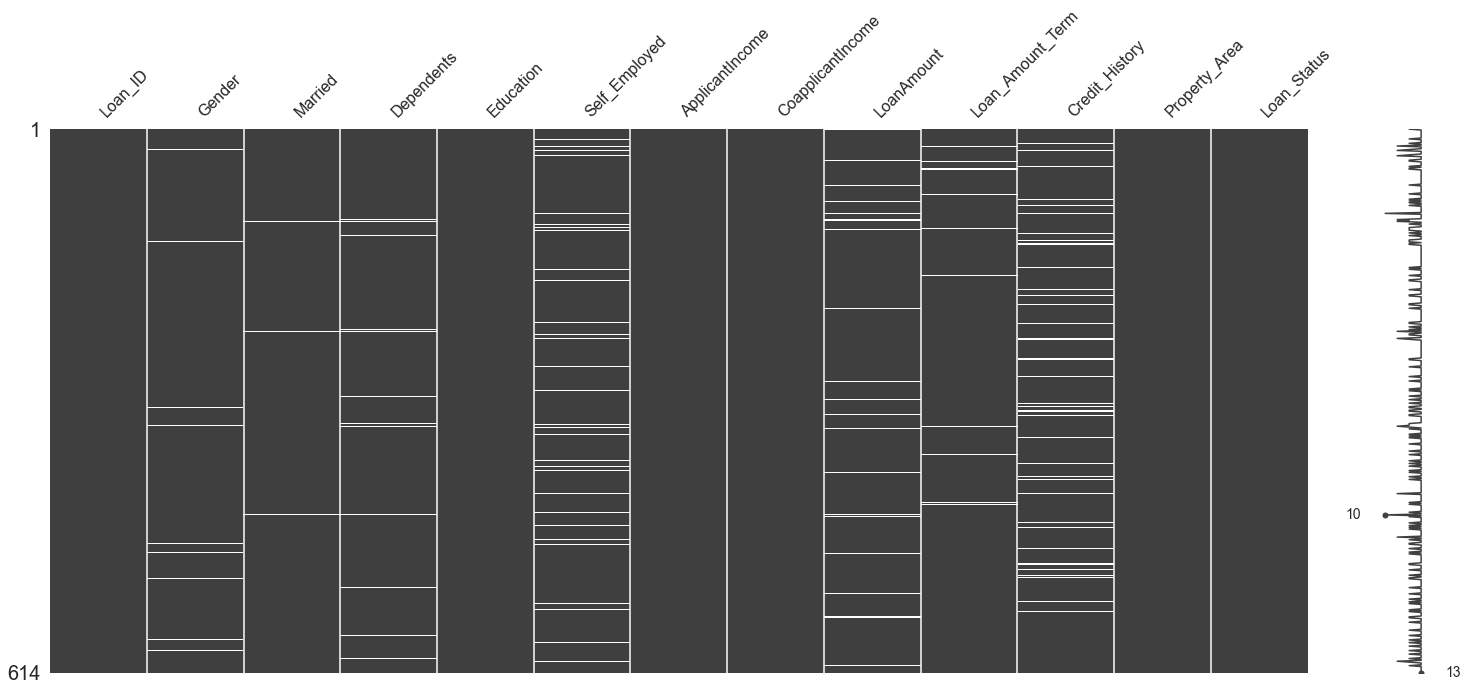

In [18]:
msno.matrix(train)

<AxesSubplot:>

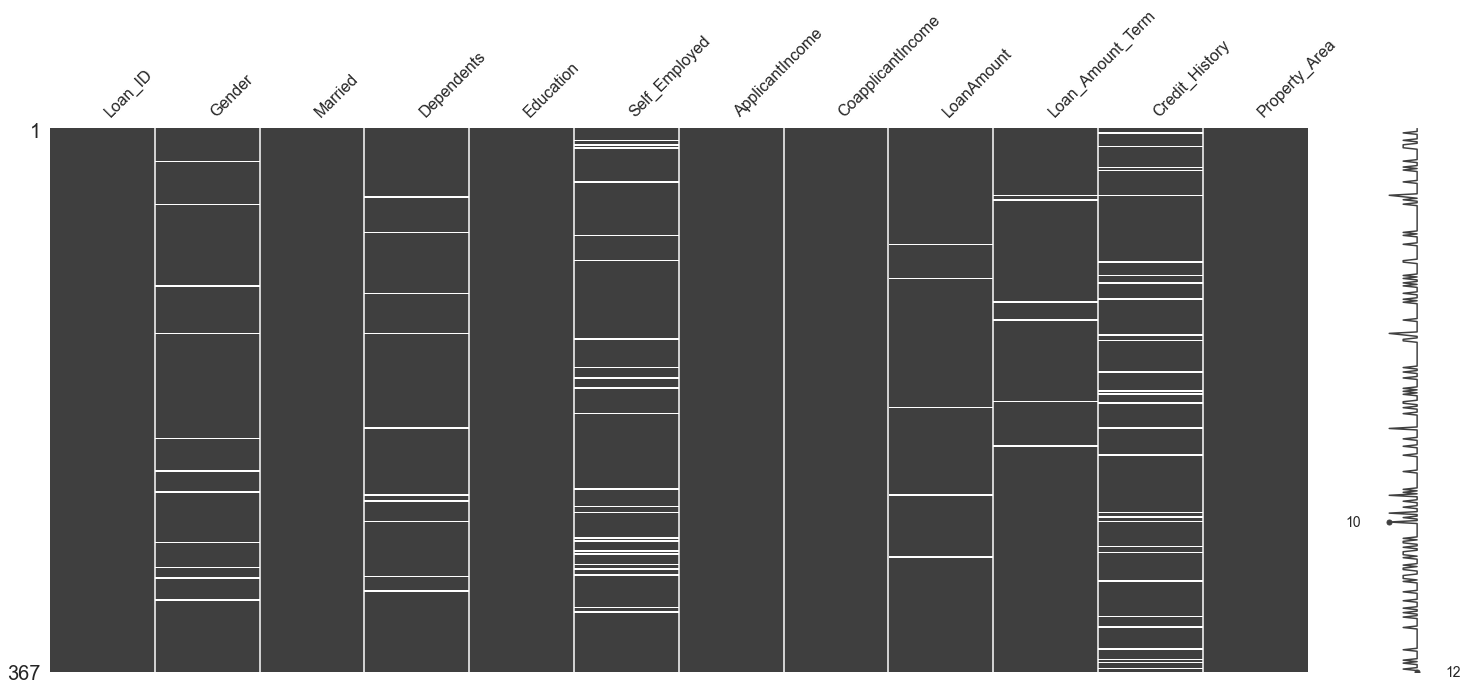

In [19]:
msno.matrix(test)

# Data preprocessing

In [20]:
#fill all null values in numerical features with mean value
train['Credit_History'].fillna(train['Credit_History'].mean(), inplace=True) 
test['Credit_History'].fillna(test['Credit_History'].mean(), inplace=True) 

train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mean(), inplace=True) 
test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].mean(), inplace=True) 

train['LoanAmount'].fillna(train['LoanAmount'].mean(), inplace=True) 
test['LoanAmount'].fillna(test['LoanAmount'].mean(), inplace=True) 

In [21]:
#encoding the categorical data
train['Gender']=train['Gender'].replace({'Male':1 , 'Female':0})
train['Married']=train['Married'].replace({'Yes':1 , 'No':0})
train['Self_Employed']=train['Self_Employed'].replace({'Yes':1 , 'No':0})
train['Loan_Status']=train['Loan_Status'].replace({'Y':1 , 'N':0})

test['Gender']=test['Gender'].replace({'Male':1 , 'Female':0})
test['Married']=test['Married'].replace({'Yes':1 , 'No':0})
test['Self_Employed']=test['Self_Employed'].replace({'Yes':1 , 'No':0})

In [23]:
#fill null values of the above converted data with the mode 
train['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
test['Gender'].fillna(test['Gender'].mode()[0], inplace=True)

train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)
train['Married'].fillna(train['Married'].mode()[0], inplace=True)

train['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
test['Dependents'].fillna(test['Dependents'].mode()[0], inplace=True)

In [24]:
#for categorical features with more than 2 categories use labelencoder 
from sklearn.preprocessing import LabelEncoder
feature_col = ['Property_Area','Education','Dependents']
le = LabelEncoder()
for col in feature_col:
    train[col] = le.fit_transform(train[col])
    test[col] = le.fit_transform(test[col])

### Visualising the data

In [25]:
train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1.0,0.0,0,0,0.0,5849,0.0,146.412162,360.0,1.0,2,1
1,LP001003,1.0,1.0,1,0,0.0,4583,1508.0,128.000000,360.0,1.0,0,0
2,LP001005,1.0,1.0,0,0,1.0,3000,0.0,66.000000,360.0,1.0,2,1
3,LP001006,1.0,1.0,0,1,0.0,2583,2358.0,120.000000,360.0,1.0,2,1
4,LP001008,1.0,0.0,0,0,0.0,6000,0.0,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0.0,0.0,0,0,0.0,2900,0.0,71.000000,360.0,1.0,0,1
610,LP002979,1.0,1.0,3,0,0.0,4106,0.0,40.000000,180.0,1.0,0,1
611,LP002983,1.0,1.0,1,0,0.0,8072,240.0,253.000000,360.0,1.0,2,1
612,LP002984,1.0,1.0,2,0,0.0,7583,0.0,187.000000,360.0,1.0,2,1


- all the features have numerical values, now see relation between them

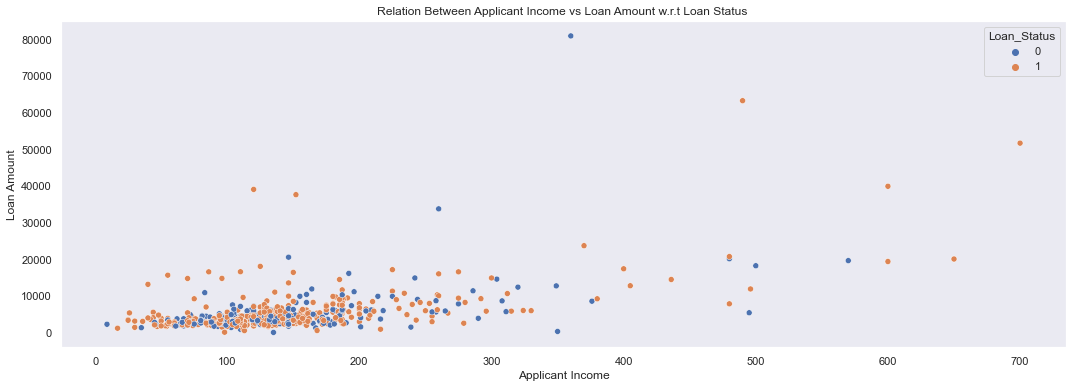

In [26]:
plt.figure(figsize=(18, 6))
sns.set(font_scale=1)
plt.title("Relation Between Applicant Income vs Loan Amount w.r.t Loan Status ")

plt.grid()
sns.scatterplot(x='LoanAmount',y='ApplicantIncome',data=train,hue='Loan_Status')
plt.xlabel("Applicant Income")
plt.ylabel("Loan Amount")
plt.show()

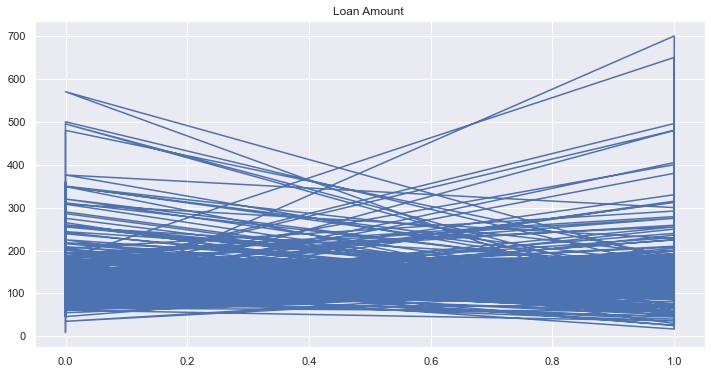

In [27]:
plt.figure(figsize=(12, 6))
plt.plot(train['Loan_Status'], train['LoanAmount'])
plt.title("Loan Amount ")
plt.show()

### Dealing with ouliers

<AxesSubplot:xlabel='CoapplicantIncome'>

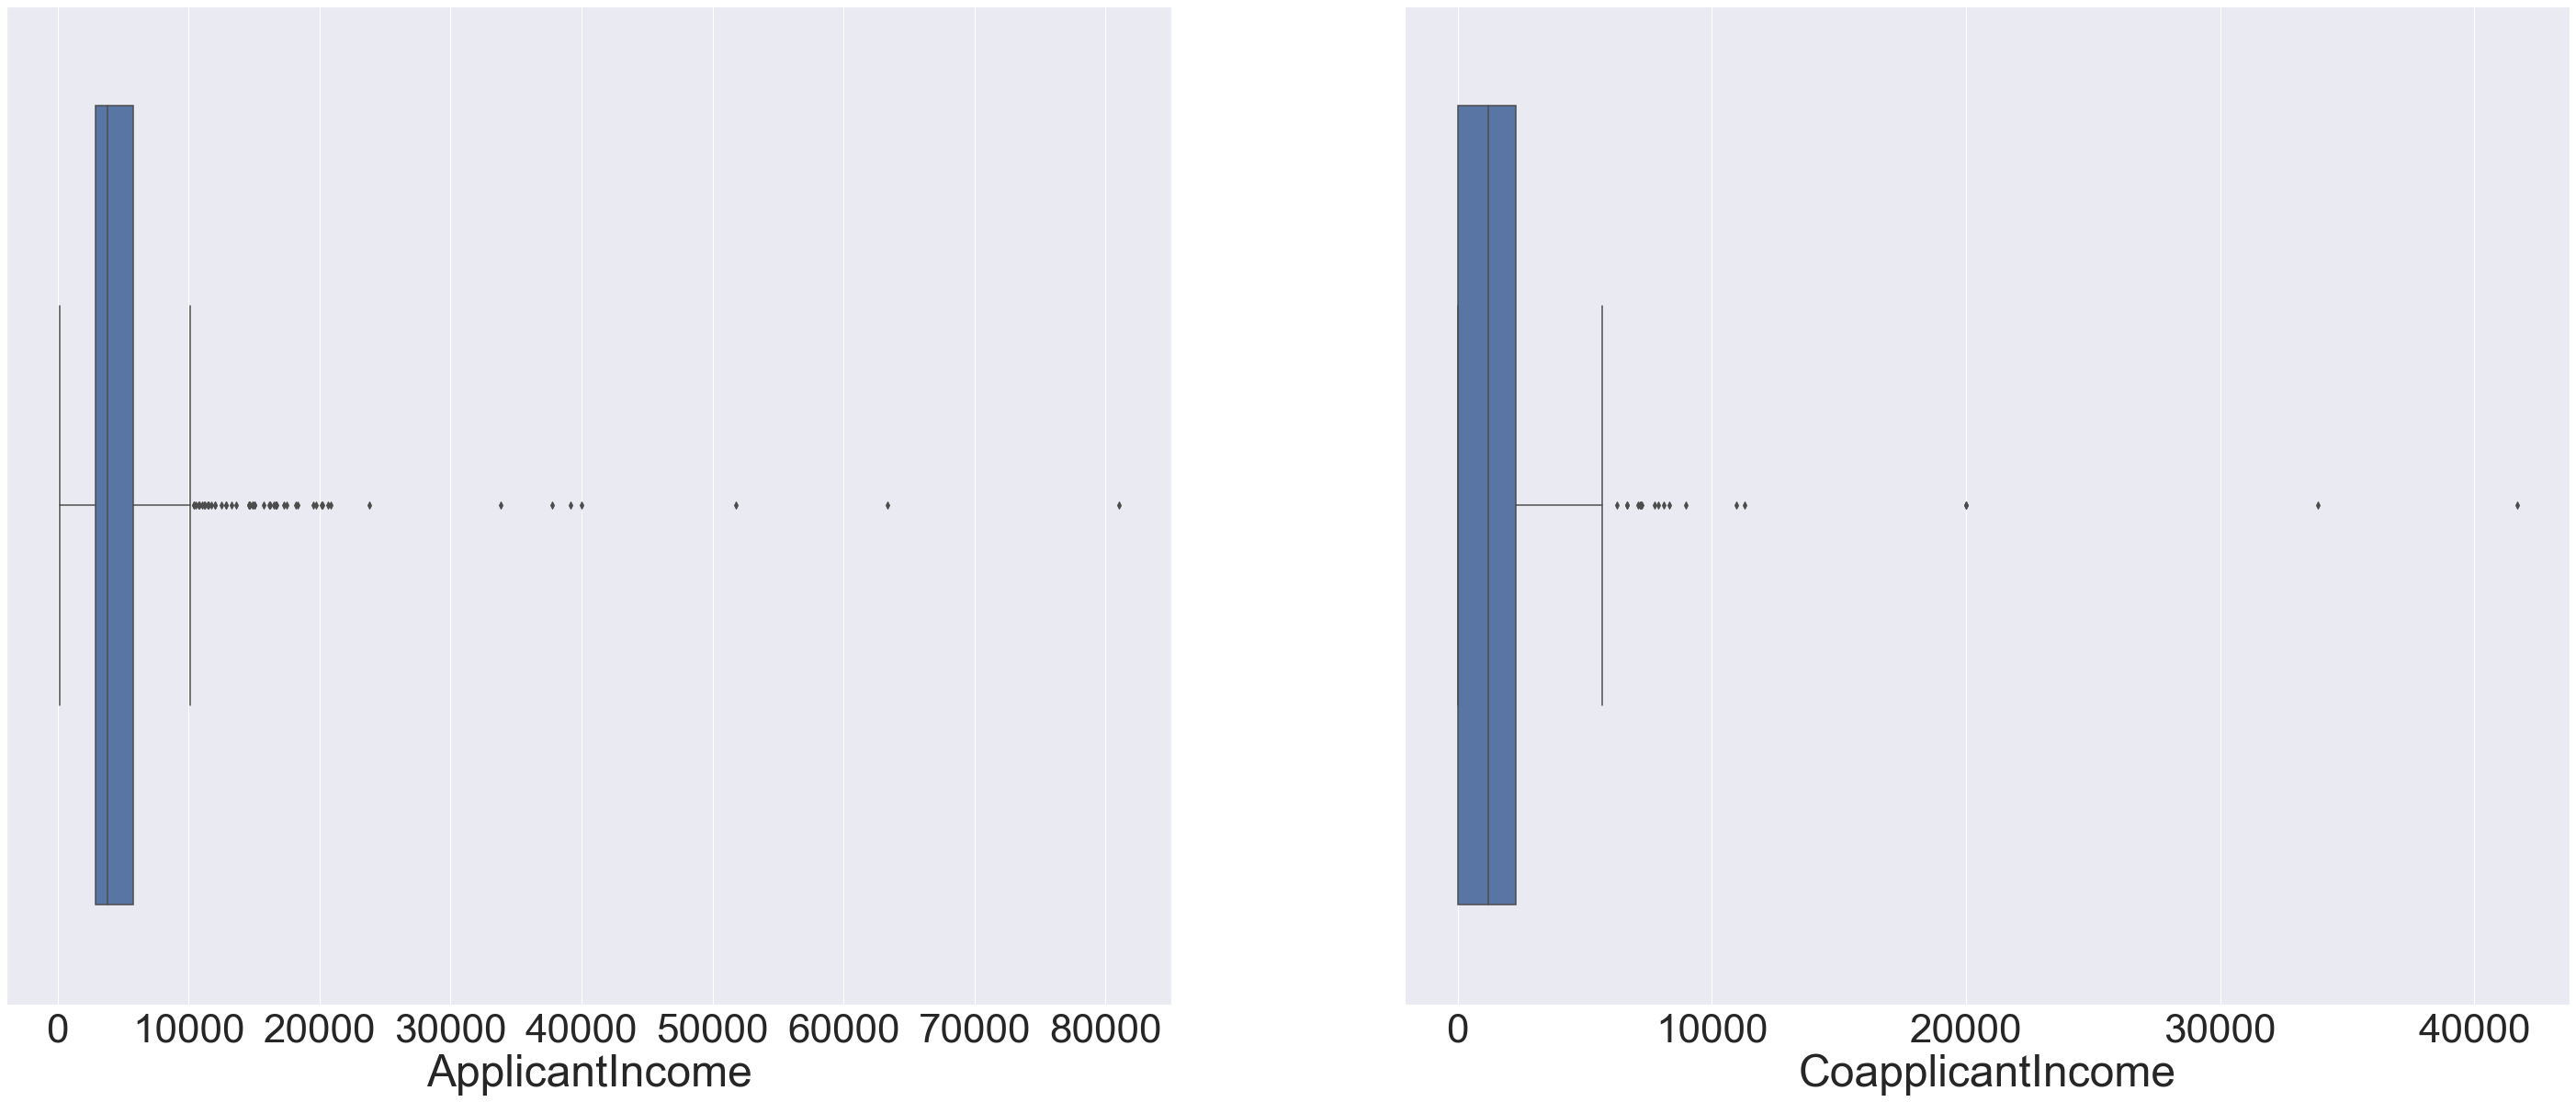

In [28]:
plt.figure(figsize=(50,20))
sns.set(font_scale=4)
plt.subplot(1,2,1)
sns.boxplot(x='ApplicantIncome',data=train)

plt.subplot(1,2,2)
sns.boxplot(x='CoapplicantIncome',data=train)

- outliers are present in both applicant income and coapplicant income

In [29]:
#function to detect outliers
outliers=[]

def detect_outlier(x):
    threshold=3
    mean = np.mean(x)
    std = np.std(x)
    
    for i in x:
        z = (i-mean)/std
        if threshold < np.abs(z):
            outliers.append(i)
            
    return(outliers)

In [30]:
AI = detect_outlier(train['ApplicantIncome'])
AI

[23803, 39999, 51763, 33846, 39147, 63337, 81000, 37719]

In [31]:
CAI = detect_outlier(train['CoapplicantIncome'])
CAI

[23803,
 39999,
 51763,
 33846,
 39147,
 63337,
 81000,
 37719,
 10968.0,
 11300.0,
 20000.0,
 20000.0,
 33837.0,
 41667.0]

- by calling the function, we can see list of all outliers present in the respective features
- to deal outliers in skewed data, use the inter quartile range to find the boundaries

In [32]:
def boundary_outlier(x):
    q1= np.percentile(x,25,axis=0)
    q3= np.percentile(x,75,axis=0)
    IQR = q3-q1
    
    lower_bound = q1-(1.5*IQR)
    upper_bound = q3+(1.5*IQR)
    print('The lower bound is {} and the upper bound is {}'.format(lower_bound,upper_bound))

In [33]:
boundary_outlier(train['ApplicantIncome'])

The lower bound is -1498.75 and the upper bound is 10171.25


In [34]:
boundary_outlier(train['CoapplicantIncome'])

The lower bound is -3445.875 and the upper bound is 5743.125


- No need to worry about the lower bound as income is not negative, so use the upper bound to find outliers exceeding the boundary and replace them with the upper bound

In [35]:
train.loc[train['ApplicantIncome']>10171.25,'ApplicantIncome']=10171.25
train.loc[train['CoapplicantIncome']>5743.125,'CoapplicantIncome']=5743.125

##### Correlation

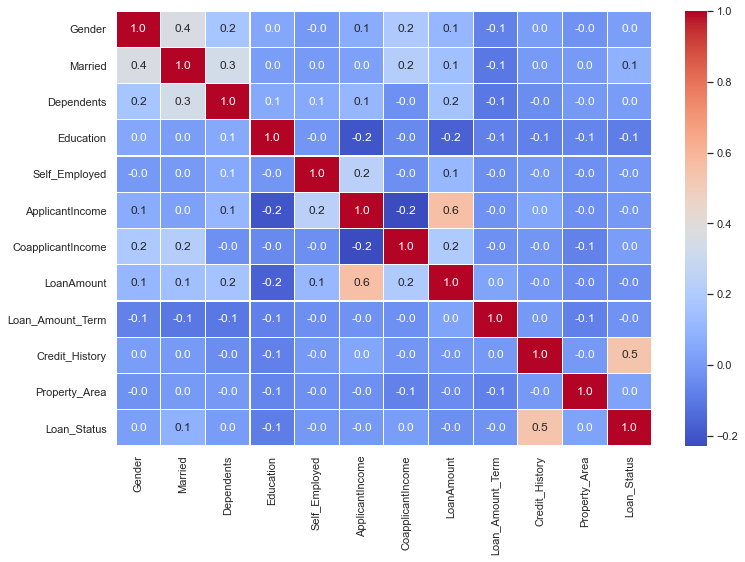

In [36]:
plt.figure(figsize=(12,8))
sns.set(font_scale=1)
sns.heatmap(train.corr(), cmap='coolwarm', annot=True, fmt='.1f', linewidths=.1)
plt.show()

- no 2 features are highly correlated(say>0.75) to drop any feature
- so drop the loan id and export the processed data as final train and test

In [37]:
train = train.drop('Loan_ID',axis=True)

In [38]:
test= test.drop('Loan_ID',axis=True)

In [39]:
#extract the processed dataset
train.to_csv('Final-train.csv',index=False)

In [40]:
test.to_csv('Final-test.csv',index=False)